<div style="text-align: center;">
    <h1> <font style="bold"> Trabajo Práctico 3 </font></h1>
    <h2><font style="bold">Detector de SPAM</font></h2>
    <h3><font style="bold">Abril Noguera - Pablo Brahim - Fermin Rodriguez - Kevin Pennington</font></h3>
</div>

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB   
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [14]:
# Leemos el dataset
df = pd.read_csv("spambase.csv")

In [4]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   word_freq_make        4601 non-null   int64
 1   word_freq_address     4601 non-null   int64
 2   word_freq_all         4601 non-null   int64
 3   word_freq_3d          4601 non-null   int64
 4   word_freq_our         4601 non-null   int64
 5   word_freq_over        4601 non-null   int64
 6   word_freq_remove      4601 non-null   int64
 7   word_freq_internet    4601 non-null   int64
 8   word_freq_order       4601 non-null   int64
 9   word_freq_mail        4601 non-null   int64
 10  word_freq_receive     4601 non-null   int64
 11  word_freq_will        4601 non-null   int64
 12  word_freq_people      4601 non-null   int64
 13  word_freq_report      4601 non-null   int64
 14  word_freq_addresses   4601 non-null   int64
 15  word_freq_free        4601 non-null   int64
 16  word_f

In [8]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


----

## Link al Repositorio
Adjunto el link al repositorio con la resulución completa. [Repositorio de Github](https://github.com/abrilnoguera/TP3-IIA)

--- 

### 1.  ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

In [15]:
# Separar SPAM y NO SPAM
spam = df[df['spam'] == 1]
not_spam = df[df['spam'] == 0]

In [16]:
# Obtener las columnas que contienen la frecuencia de palabras
word_columns = [col for col in df.columns if col.startswith('word_freq_')]

# Sumar frecuencias de palabras
spam_word_freq = spam[word_columns].sum()
not_spam_word_freq = not_spam[word_columns].sum()

# Crear diccionarios de palabra:frecuencia
spam_word_freq_dict = {col.replace('word_freq_', ''): freq for col, freq in spam_word_freq.items()}
not_spam_word_freq_dict = {col.replace('word_freq_', ''): freq for col, freq in not_spam_word_freq.items()}

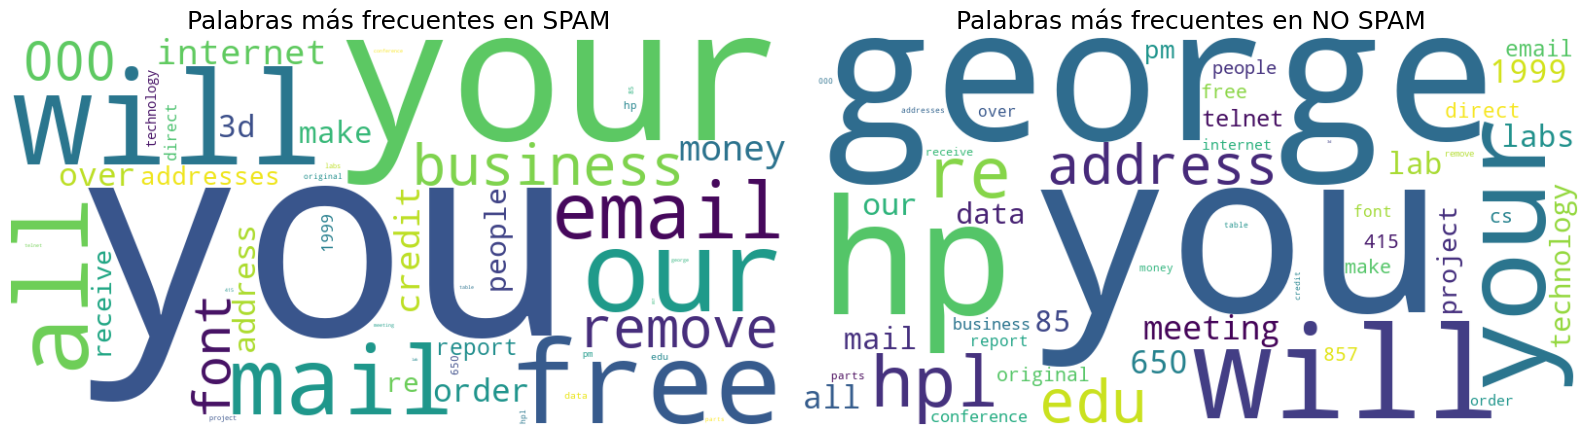

In [17]:

#%pip install wordcloud
# supongo, no se si se llama asi el paquete
from wordcloud import WordCloud

# Crear nubes de palabras
spam_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(spam_word_freq_dict)
not_spam_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(not_spam_word_freq_dict)

# Graficar
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].imshow(spam_wc, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Palabras más frecuentes en SPAM', fontsize=18)

axs[1].imshow(not_spam_wc, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Palabras más frecuentes en NO SPAM', fontsize=18)

plt.tight_layout()
plt.show()

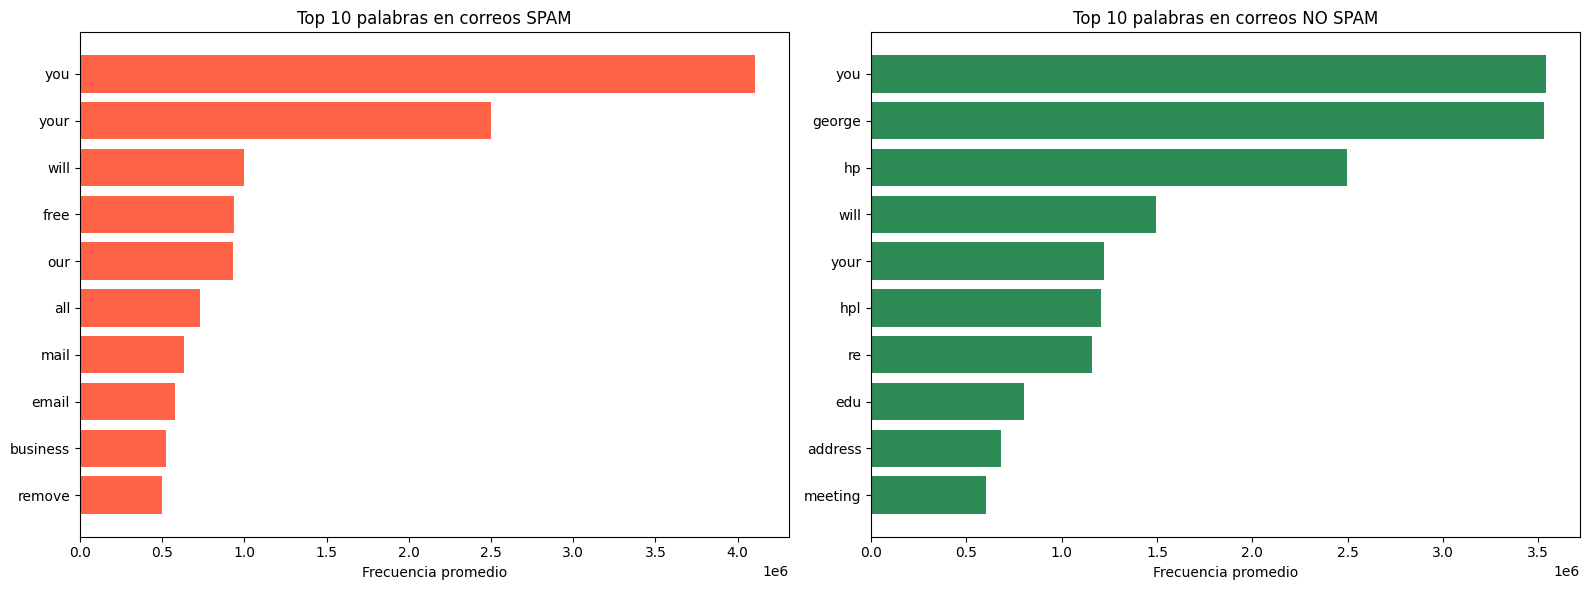

In [18]:
# Ordenar y obtener las 10 palabras más frecuentes
spam_top10 = dict(sorted(spam_word_freq_dict.items(), key=lambda item: item[1], reverse=True)[:10])
not_spam_top10 = dict(sorted(not_spam_word_freq_dict.items(), key=lambda item: item[1], reverse=True)[:10])

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico para SPAM
axes[0].barh(list(spam_top10.keys()), list(spam_top10.values()), color='tomato')
axes[0].set_title('Top 10 palabras en correos SPAM')
axes[0].invert_yaxis()
axes[0].set_xlabel('Frecuencia promedio')

# Gráfico para NO SPAM
axes[1].barh(list(not_spam_top10.keys()), list(not_spam_top10.values()), color='seagreen')
axes[1].set_title('Top 10 palabras en correos NO SPAM')
axes[1].invert_yaxis()
axes[1].set_xlabel('Frecuencia promedio')

plt.tight_layout()
plt.show()

In [24]:
common_words = set(spam_top10.keys()) & set(not_spam_top10.keys())
print("\nPALABRAS EN COMÚN EN AMBOS TOP 10:", common_words)


PALABRAS EN COMÚN EN AMBOS TOP 10: {'your', 'you', 'will'}


Hay tres palabras en común: *will*, *you* y *your*, que son además las mas frecuentes en correos spam. 

Palabras en los mails no spam, como george, hp y hpl llaman la atención, en primera instancia. Pero deja de sorprender si se piensa que la base de datos fue creada por George Forman et. al. en HP Labs

---
### 2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

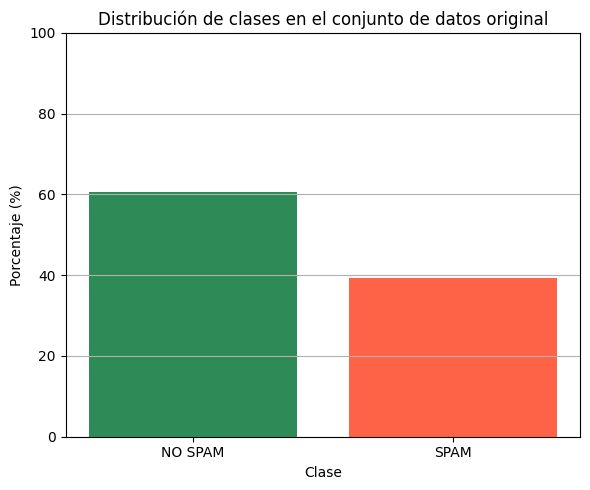

In [31]:
import matplotlib.pyplot as plt

# Conteo de clases en el dataset original
class_counts = df['spam'].value_counts(normalize=True) * 100

# Graficar
plt.figure(figsize=(6, 5))
plt.bar(class_counts.index.map({0: 'NO SPAM', 1: 'SPAM'}), class_counts.values, color=['seagreen', 'tomato'])
plt.title('Distribución de clases en el conjunto de datos original')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Clase')
plt.grid(axis='y')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [32]:
# Separar features y target
X = df.drop(columns='spam')
y = df['spam']

# Realizar el split 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

---
### 3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

In [62]:
nb_pipe = Pipeline([
    # ('scaler', MinMaxScaler()),    # min max porque necesitamos inputs no negativos
    ('nb', MultinomialNB())     
])
nb_pipe.fit(X_train, y_train)


Pipeline(steps=[('nb', MultinomialNB())])

In [63]:
# esto es para ver que da
y_pred_nb = nb_pipe.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       837
           1       0.77      0.96      0.86       544

    accuracy                           0.87      1381
   macro avg       0.87      0.89      0.87      1381
weighted avg       0.89      0.87      0.87      1381



---
### 4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

In [48]:
# Crear el pipeline: escalador + regresión logística
pipe = Pipeline([
    ('scaler', StandardScaler()),           # Paso 1: normalizar los datos
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))  # Paso 2: ajustar el modelo
])

# Entrenar el pipeline en el set de entrenamiento
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

In [49]:
# Predecir sobre el conjunto de test
y_pred_logr = pipe.predict(X_test)

In [51]:
# esto es para ver que da
print(classification_report(y_test, y_pred_logr))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       837
           1       0.91      0.87      0.89       544

    accuracy                           0.92      1381
   macro avg       0.92      0.91      0.91      1381
weighted avg       0.92      0.92      0.92      1381



---
### 5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

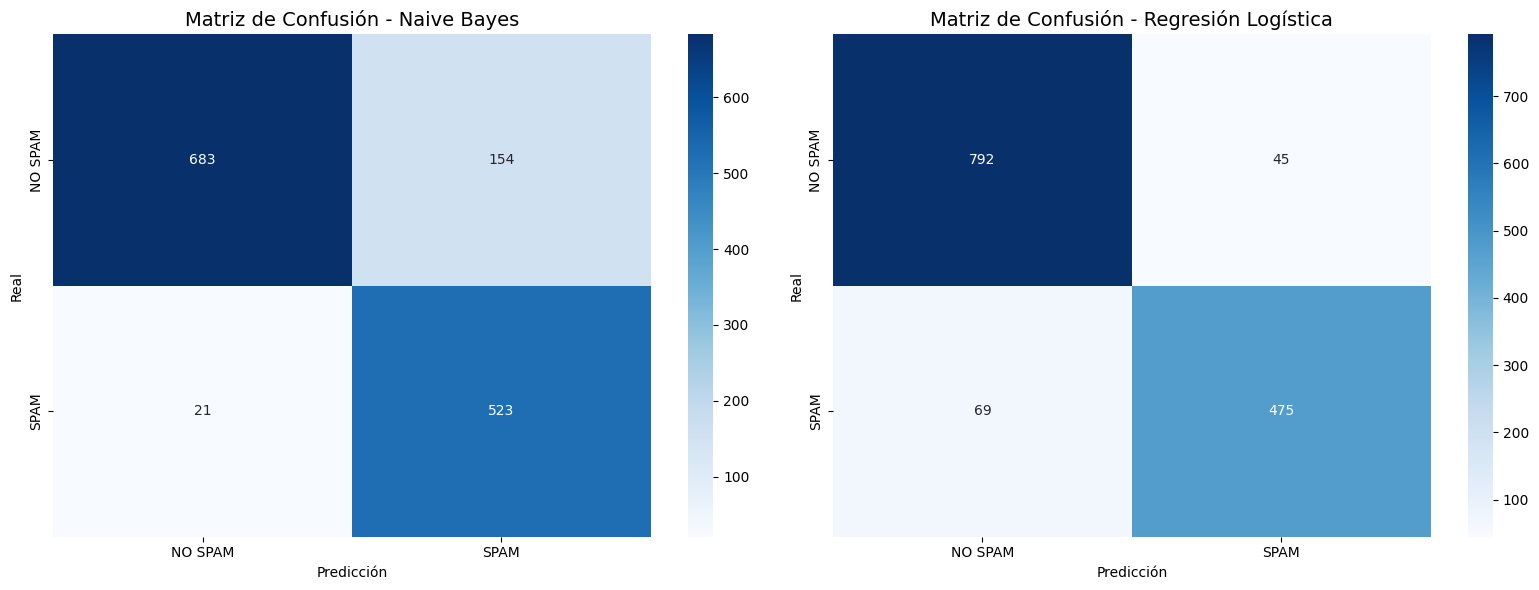

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión para Naive Bayes
cm_bayes = confusion_matrix(y_test, y_pred_nb)

# Matriz de confusión para Regresión Logística
cm_logr = confusion_matrix(y_test, y_pred_logr)

# Crear figura
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Naive Bayes
sns.heatmap(cm_bayes, annot=True, fmt='d', cmap='Blues', xticklabels=['NO SPAM', 'SPAM'], yticklabels=['NO SPAM', 'SPAM'], ax=axes[0])
axes[0].set_title('Matriz de Confusión - Naive Bayes', fontsize=14)
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# Regresión Logística
sns.heatmap(cm_logr, annot=True, fmt='d', cmap='Blues', xticklabels=['NO SPAM', 'SPAM'], yticklabels=['NO SPAM', 'SPAM'], ax=axes[1])
axes[1].set_title('Matriz de Confusión - Regresión Logística', fontsize=14)
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

---
### 6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

In [66]:
# Precisión y Recall para Naive Bayes
precision_bayes = precision_score(y_test, y_pred_nb)
recall_bayes = recall_score(y_test, y_pred_nb)

# Precisión y Recall para Regresión Logística
precision_logr = precision_score(y_test, y_pred_logr)
recall_logr = recall_score(y_test, y_pred_logr)

# Mostrar resultados
print("Naive Bayes:")
print(f"  Precisión: {precision_bayes:.4f}")
print(f"  Recall:    {recall_bayes:.4f}\n")

print("Regresión Logística:")
print(f"  Precisión: {precision_logr:.4f}")
print(f"  Recall:    {recall_logr:.4f}")

Naive Bayes:
  Precisión: 0.7725
  Recall:    0.9614

Regresión Logística:
  Precisión: 0.9135
  Recall:    0.8732


---
### 7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

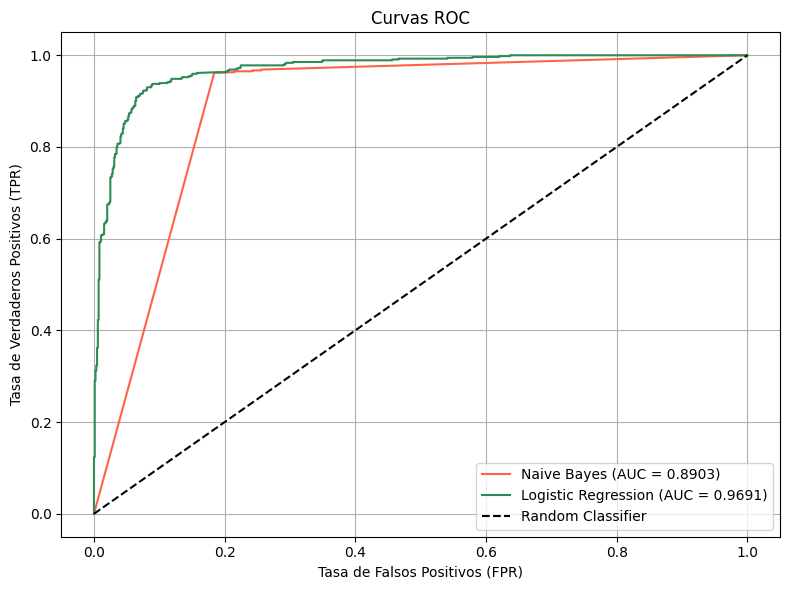

AUC Naive Bayes: 0.8903
AUC Regresión Logística: 0.9691


In [73]:
# Probabilidades de predicción (no solo 0/1)
y_prob_nb = nb_pipe.predict_proba(X_test)[:, 1]
y_prob_logr = pipe.predict_proba(X_test)[:, 1]

# Curva ROC para Naive Bayes
fpr_bayes, tpr_bayes, _ = roc_curve(y_test, y_prob_nb)
auc_bayes = roc_auc_score(y_test, y_prob_nb)

# Curva ROC para Regresión Logística
fpr_logr, tpr_logr, _ = roc_curve(y_test, y_prob_logr)
auc_logr = roc_auc_score(y_test, y_prob_logr)

# Graficar ambas curvas ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_bayes, tpr_bayes, label=f'Naive Bayes (AUC = {auc_bayes:.4f})', color='tomato')
plt.plot(fpr_logr, tpr_logr, label=f'Logistic Regression (AUC = {auc_logr:.4f})', color='seagreen')
plt.plot([0,1], [0,1], 'k--', label='Random Classifier')

plt.title('Curvas ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar valores
print(f"AUC Naive Bayes: {auc_bayes:.4f}")
print(f"AUC Regresión Logística: {auc_logr:.4f}")

---

# Link al Notebook
Se puede encontrar el trabajo completo en el siguiente link: [Repositorio GitHub](https://github.com/abrilnoguera/TP3-IIA)

In [76]:
import os
os.getcwd()

'/home/ghost/ceia/iia/TP3-IIA'